In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch_geometric as tg
from torch_geometric.data import Data
from torch_geometric.utils import subgraph
from torch_geometric.nn import GAE, VGAE, GCNConv
from torch_geometric.utils.convert import from_networkx
import networkx as nx

In [3]:
import local2global_embedding.embedding.gae as gae
from local2global_embedding.network import TGraph

In [4]:
from dataloader import DataLoader
from models import speye, VGAEconv, GAEconv, VGAE_loss, GAE_loss, train

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ', device)

Device:  cuda


# Graph embeddings

To begin with, we consider three ways to embed the graph data: SVD, GAE and VGAE.

### Load and explore dataset

Before going into the patch graph, we explore embeddings of individual days using different methods.

In [6]:
date = '20000102'

In [7]:
dl = DataLoader(dataset='AS-733')
graph = dl.get_graph(date)
graph

array([[    1,     1,     1, ..., 65002, 65051, 65105],
       [  701,  2914,  2828, ...,  6509,  1668, 10994]])

In [8]:
# Create graph information in various formats that will be useful 
G=nx.from_edgelist(list(graph.transpose()))
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
edge_index = graph
tgraph = TGraph(edge_index)
node_list = np.unique(edge_index[0,:])

In [9]:
print('Number of nodes:' , num_nodes)
print('Number of edges:' , num_edges)
print('Number of trinagles:' , int(sum(nx.triangles(G).values())/3))
print('Number of self loops:', nx.number_of_selfloops(G))
if nx.is_connected(G):
    print('Is connected')

Number of nodes: 6474
Number of edges: 13895
Number of trinagles: 6584
Number of self loops: 1323
Is connected


### SVD Embedding

To be done. This is essentially PCA on the normalised adjacency matrix.

### GAE

In [10]:
test_data = Data(x=speye(dl.num_nodes), edge_index=torch.tensor(edge_index))
neg_edges = tg.utils.negative_sampling(test_data.edge_index, num_nodes=test_data.num_nodes)

In [11]:
model = GAE(encoder=GAEconv(2, test_data.num_node_features))

In [12]:
model = train(test_data, model, loss_fun=GAE_loss, num_epochs=200)

epoch 0: loss=1.3862941265106201
epoch 1: loss=1.379939079284668
epoch 2: loss=1.358974575996399
epoch 3: loss=1.3200597763061523
epoch 4: loss=1.2635209560394287
epoch 5: loss=1.1939619779586792
epoch 6: loss=1.1191871166229248
epoch 7: loss=1.0461993217468262
epoch 8: loss=0.9801418781280518
epoch 9: loss=0.9228682518005371
epoch 10: loss=0.874388575553894
epoch 11: loss=0.8344501256942749
epoch 12: loss=0.8004703521728516
epoch 13: loss=0.7748931646347046
epoch 14: loss=0.7537899613380432
epoch 15: loss=0.738021194934845
epoch 16: loss=0.7278551459312439
epoch 17: loss=0.721011757850647
epoch 18: loss=0.7203672528266907
epoch 19: loss=0.7198572158813477
epoch 20: loss=0.7126175165176392
epoch 21: loss=0.7243722081184387
epoch 22: loss=0.7201154828071594
epoch 23: loss=0.7236119508743286
epoch 24: loss=0.7247927784919739
epoch 25: loss=0.7268640398979187
epoch 26: loss=0.7343525886535645
epoch 27: loss=0.7349995374679565
epoch 28: loss=0.7388103008270264
epoch 29: loss=0.738129436969

In [15]:
with torch.no_grad():
    coord_ip = model.encode(test_data).numpy()

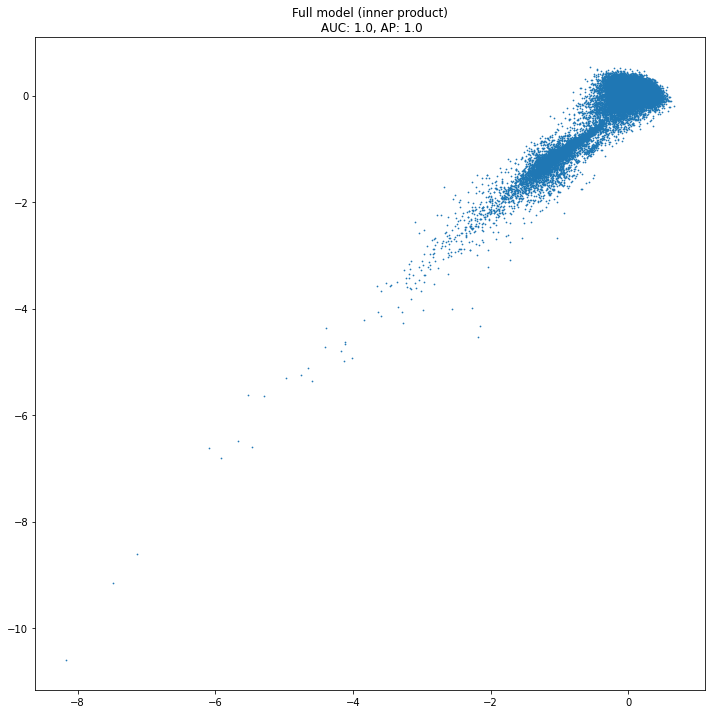

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
ax.scatter(coord_ip[:, 0], coord_ip[:, 1], c=test_data.y, s=0.5)
auc, ap = model.test(torch.tensor(coord_ip), test_data.edge_index, neg_edges)
t = plt.title(f'Full model (inner product)\n AUC: {auc:.3}, AP: {ap:.3}')

In progress: embed induce subgraph (that is, without isolated nodes), use higher dimensions and visualise with UMAP, compute patches.

### VGAE

In [ ]:
model = VGAE(encoder=VGAEconv(2, test_data.num_node_features))

In [ ]:
model = train(test_data, model, loss_fun=VGAE_loss, num_epochs=200)